# Stock Price Analysis Notebook

## Overview

This notebook performs a comprehensive analysis of historical stock prices for three major technology companies: Apple Inc. (AAPL), Microsoft Corporation (MSFT), and Alphabet Inc. (GOOGL). The analysis covers stock price trends, moving averages, and highlights significant events.

## Libraries Used

### 1. `yfinance`

The `yfinance` library is used to download historical stock price data. It provides an easy way to access financial data from Yahoo Finance.

- **Installation**: `pip install yfinance`
- **Purpose**: To fetch historical adjusted closing prices for specified stock tickers over a defined date range.

### 2. `pandas`

The `pandas` library is employed for data manipulation and analysis. It helps in handling time-series data, calculating moving averages, and preparing data for visualization.

- **Installation**: `pip install pandas`
- **Purpose**: To read, manipulate, and analyze stock price data. Specifically, it handles CSV operations and rolling calculations for moving averages.

### 3. `matplotlib`

The `matplotlib` library is used for creating static, animated, and interactive visualizations in Python. In this notebook, it is used to generate line plots to visualize stock price trends and moving averages.

- **Installation**: `pip install matplotlib`
- **Purpose**: To plot stock prices, moving averages, and highlight significant events on a time-series graph.

## Notebook Workflow

1. **Download Historical Stock Data**: 
   - Using `yfinance`, historical adjusted closing prices for Apple, Microsoft, and Alphabet are downloaded for the year 2023.

2. **Data Storage and Retrieval**: 
   - The downloaded data is saved to a CSV file (`historical_stock_prices.csv`) and then read back into the notebook for processing.

3. **Data Analysis**:
   - **Moving Averages**: The 20-day moving averages for each stock are calculated using `pandas`. Moving averages help smooth out price data to identify trends.

4. **Visualization**:
   - **Plot Stock Prices and Moving Averages**: 
     - `matplotlib` is used to create a line plot showing the daily adjusted closing prices and the 20-day moving averages for each stock.
     - **Highlight Significant Events**: Specific dates are annotated on the plot to mark significant events.

## Plot Explanation

The final plot includes:
- Line plots for daily adjusted closing prices of Apple, Microsoft, and Alphabet.
- Dashed lines representing the 20-day moving averages for each stock.
- Annotations for significant events to provide context.

This analysis helps in understanding the stock price trends and the impact of significant events on the stocks of major technology companies.


In [1]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

# Download historical stock data for Apple, Microsoft, and Alphabet
tickers = ['AAPL', 'MSFT', 'GOOGL']
start_date = '2023-01-01'
end_date = '2023-12-31'

data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']


[*********************100%%**********************]  3 of 3 completed


In [2]:
# Calculate the 20-day moving average
moving_avg_window = 20
data['AAPL_MA'] = data['AAPL'].rolling(window=moving_avg_window).mean()
data['MSFT_MA'] = data['MSFT'].rolling(window=moving_avg_window).mean()
data['GOOGL_MA'] = data['GOOGL'].rolling(window=moving_avg_window).mean()


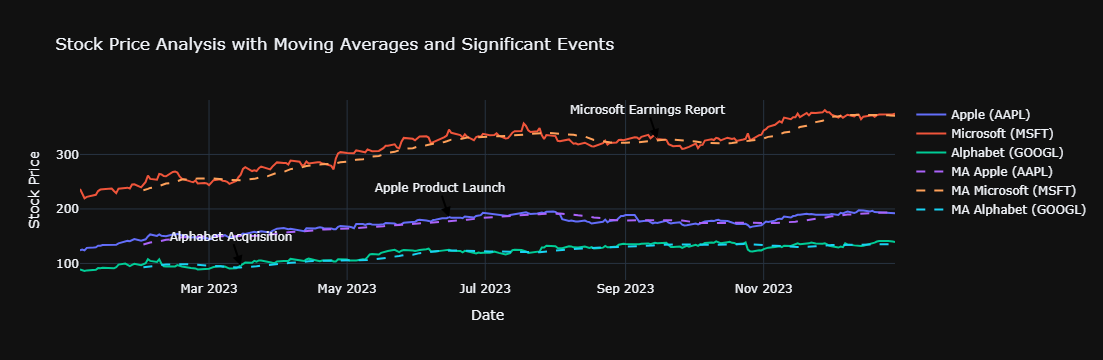

In [4]:
# Initialize the figure
fig = go.Figure()

# Add line plots for each company
fig.add_trace(go.Scatter(x=data.index, y=data['AAPL'], mode='lines', name='Apple (AAPL)'))
fig.add_trace(go.Scatter(x=data.index, y=data['MSFT'], mode='lines', name='Microsoft (MSFT)'))
fig.add_trace(go.Scatter(x=data.index, y=data['GOOGL'], mode='lines', name='Alphabet (GOOGL)'))

# Add moving average lines
fig.add_trace(go.Scatter(x=data.index, y=data['AAPL_MA'], mode='lines', name='MA Apple (AAPL)', line=dict(dash='dash')))
fig.add_trace(go.Scatter(x=data.index, y=data['MSFT_MA'], mode='lines', name='MA Microsoft (MSFT)', line=dict(dash='dash')))
fig.add_trace(go.Scatter(x=data.index, y=data['GOOGL_MA'], mode='lines', name='MA Alphabet (GOOGL)', line=dict(dash='dash')))

# Highlight significant events
events = [
    {'date': '2023-06-15', 'company': 'AAPL', 'event': 'Apple Product Launch'},
    {'date': '2023-09-15', 'company': 'MSFT', 'event': 'Microsoft Earnings Report'},
    {'date': '2023-03-15', 'company': 'GOOGL', 'event': 'Alphabet Acquisition'}
]

for event in events:
    event_date = pd.to_datetime(event['date'])
    if event['company'] == 'AAPL':
        y_value = data.loc[event_date, 'AAPL']
    elif event['company'] == 'MSFT':
        y_value = data.loc[event_date, 'MSFT']
    else:
        y_value = data.loc[event_date, 'GOOGL']

    fig.add_annotation(
        x=event_date, y=y_value,
        text=event['event'],
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor='black',
        showarrow=True
    )

# Update layout
fig.update_layout(
    title='Stock Price Analysis with Moving Averages and Significant Events',
    xaxis_title='Date',
    yaxis_title='Stock Price',
    template='plotly_dark'
)

# Show the interactive plot
fig.show()
